In [7]:
from google.colab import drive
from pathlib import Path
drive.mount("/gdrive", force_remount=True)

ModuleNotFoundError: No module named 'google.colab'

In [8]:
%load_ext autoreload
%autoreload 2

import sys

from pathlib import Path
base = Path('/gdrive/My Drive/furniture-images/img/')
sys.path.append(str(base))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
zip_path = base/'furniture_images.zip'
!cp "{zip_path}" .
!unzip -q furniture_images.zip
!rm furniture_images.zip

'cp' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


In [10]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [11]:
import tensorflow as tf

import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.applications.inception_v3 import preprocess_input

import os
import random

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [12]:
base_dir = 'furniture-images/img'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
category = os.listdir(train_dir)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'furniture-images/img\\train'

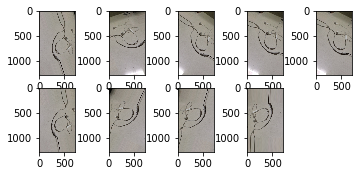

In [28]:
# example of random rotation image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('door1.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(350 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()